<h1 align=center><font size = 5>Clustering of Railway Stations on Suburban railway  lines in Mumbai, India</font></h1>

## Introduction
<p>The Mumbai suburban rail network, which is the commuter rail network of the city of Mumbai, India, is one of the busiest commuter rail networks in the world.  It carries more than 7.5 million passengers in a normal day and it is spread over 340km of track length. It has about 150 railway stations covering the city and the suburban areas. </p> 
<p>Most of the customers of this rail network are the middle class and working class population and there is an economy surrounding such commuters.  Many small time vendors and shopkeepers depend on the traffic at each station and such businesses form one of the major part of the informal economy of India.</p>
<p>The railways stations are also a major crowd management hotspots.  Thousands of people converge in a small area in a short time and they disperse to various palces.  Being the backbone of the entire transport network of the city, study of the traffic flow at these railway stations are important in both large scale and locality level city planning. </p>
<p> When the network and stations were originally planned, the city was different.  Today the city has grown and many of the once remote stations have now become the centres of new developments.  An analysis of how each railway station has developed will help in better urban planning.</p>
<p> In this regard, the mumbai suburban railway stations are studied using clustering to see how similar or how different each station has grown to in terms of establishments that have come up around them.  The popular venues are used to cluster the railway stations, and the popularity is dependant on two factors at the least: (1) establishments around the stations and (2) type of travellers who frequent one station.  Since the types of establishments that have come up at a location will also be related the type of people who frequent the stations, the popular locations should be a good parameter to classify the stations with.  It is hoped that this analysis will help in better city planning around each station.</p>

# Business Problem
How different or how similar are the railway stations along the suburban lines of the city of Mumbai, in terms of the popular establishments around them

# Data
For this project the following data will be used:
1. List of suburban railway stations:
source: Wikipedea
Link: https://en.wikipedia.org/wiki/List_of_Mumbai_Suburban_Railway_stations
2. Coordinates of each railway stations:
from different sources using geopy library
3. Venues data:
source: Forsquare

<p> We will get a list of the railway stations from the wikipedia page and convert it into a pandas data frame.  Then for each station, we will get the geo coordinates using geopy.  Using the latitude and logitude of each station, we will collect nearby venues from Forsquare and then conduct analyses.</p>

# Get data and preprocess it

In [1]:
import numpy as np
import pandas as pd

### Station list from Wikipdeia

In [2]:
rs = pd.read_html('https://en.wikipedia.org/wiki/List_of_Mumbai_Suburban_Railway_stations')

In [3]:
rs[1]["Station Name", "English"]

0          Airoli
1       Ambarnath
2         Ambivli
3         Andheri
4        Asangaon
          ...    
146    Aman Lodge
147    Jummapatti
148    Water Pipe
149       Gholvad
150    Bordi Road
Name: (Station Name, English), Length: 151, dtype: object

In [4]:
stationNames = pd.DataFrame(rs[1]["Station Name", "English"])
#stationNames = pd.DataFrame(rs[1][:][1], dtype=str)
#stationNames.drop(index=[1,0],inplace=True)
stationNames.reset_index(drop=True, inplace=True)
stationNames.columns=['StationName']
print("Number of stations = ", len(stationNames))
stationNames.head()

Number of stations =  151


,StationName
0,Airoli
1,Ambarnath
2,Ambivli
3,Andheri
4,Asangaon


### Get lattitude and longitude using geopy

In [5]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests
print(stationNames.head())
stationNames["latitude"] = None
stationNames["longitude"] = None
stationNames.set_index( 'StationName', inplace=True )

print(stationNames.head())


  StationName
0      Airoli
1   Ambarnath
2     Ambivli
3     Andheri
4    Asangaon
            latitude longitude
StationName                   
Airoli          None      None
Ambarnath       None      None
Ambivli         None      None
Andheri         None      None
Asangaon        None      None


In [ ]:
for stn, row in stationNames.iterrows():
    address = stn+" railway station"
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    try:
        lat = location.latitude
    except:
        lat = None
    try:
        lon = location.longitude
    except:
        lon = None
    stationNames.at[stn, "latitude"] = lat
    stationNames.at[stn, "longitude"] = lon
    print(stn+" railway station: ", lat, lon)


In [6]:
#Save the list to a csv for test runs even if there is a problem in connection/service
#stationNames.to_csv('railway_station.csv')

In [7]:
#Uncomment the following to read from a saved list
#stationNames = pd.read_csv('railway_station.csv')

In [8]:
#Remove stations with no or NaN coordinates
stationNames.dropna(inplace=True)
stationNames.head()

,StationName,latitude,longitude
0,Airoli,19.159246,72.998512
1,Ambarnath,19.094332,73.300895
2,Ambivli,19.267645,73.171863
3,Andheri,19.119698,72.846420
4,Asangaon,19.440912,73.306518


In [9]:
#Plot on a map
import folium
lat_centre = 18.975
lon_centre =  72.8258

mumbai_basemap = folium.Map(location=[lat_centre, lon_centre], zoom_start=9)

#Reset the index, so that it is easy to get station names.  First take backup.
stationNames.reset_index(inplace=True)

#show stations on map
for stn, lat, lng in zip(stationNames['StationName'], stationNames['latitude'], stationNames['longitude']):
    label = '{}'.format(stn)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mumbai_basemap)  
    
mumbai_basemap.save(outfile='station_map.html')
mumbai_basemap

### Venue data from Foursquare

In [10]:
#Get venue data

#Forsquare essentials
CLIENT_ID = 'ZO4QY0P0RAH4CMHYEAE20ACVK1JXHSRMRJDOBJKTTAP5BDK4' # your Foursquare ID
CLIENT_SECRET = 'CNB0GLBLRBEI5JGLWGCRSJB3TYDJ3EAVR2N33ECPA4YOT3UR' # your Foursquare Secret
VERSION = '20180604'

#Our data requirements:
LIMIT = 100

print('User credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


User credentails:
CLIENT_ID: ZO4QY0P0RAH4CMHYEAE20ACVK1JXHSRMRJDOBJKTTAP5BDK4
CLIENT_SECRET:CNB0GLBLRBEI5JGLWGCRSJB3TYDJ3EAVR2N33ECPA4YOT3UR


In [11]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Station', 
                  'Station Latitude', 
                  'Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
#Get neighborhood data

#To get the venues from  Foursquare uncomment the following
#station_venues = getNearbyVenues(names=stationNames['StationName'],
#                                   latitudes=stationNames['latitude'],
#                                   longitudes=stationNames['longitude']
#                                  )

#To avoid running the above code lot of times during testing, I have saved the venues data frame in stationVenues.csv
#To read from the file, uncomment the following:
#station_venues = pd.read_csv('stationVenues.csv')

In [13]:
print(station_venues.head())
print("\nNo. of unique categories: {}".format(len(station_venues['Venue Category'].unique())))
station_venues.groupby('Station').count()
#station_venues.to_csv('stationVenues.csv')

   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
0           0             0               0                 0   
1           1             1               1                 1   
2           2             2               2                 2   
3           3             3               3                 3   
4           4             4               4                 4   

   Unnamed: 0.1.1.1.1    Station  Station Latitude  Station Longitude  \
0                   0     Airoli         19.159246          72.998512   
1                   1     Airoli         19.159246          72.998512   
2                   2     Airoli         19.159246          72.998512   
3                   3     Airoli         19.159246          72.998512   
4                   4  Ambarnath         19.094332          73.300895   

                        Venue  Venue Latitude  Venue Longitude  \
0                    Priyanka       19.160196        72.999977   
1                     canteen       19

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Station Latitude,Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Station,,,,,,,,,,,
Airoli,4,4,4,4,4,4,4,4,4,4,4
Ambarnath,3,3,3,3,3,3,3,3,3,3,3
Ambivli,3,3,3,3,3,3,3,3,3,3,3
Andheri,10,10,10,10,10,10,10,10,10,10,10
Asangaon,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...
Vikhroli,12,12,12,12,12,12,12,12,12,12,12
Vile Parle,22,22,22,22,22,22,22,22,22,22,22
Virar,1,1,1,1,1,1,1,1,1,1,1


           Venue
Station         
Airoli         4
Ambarnath      3
Ambivli        3
Andheri       10
Asangaon       6


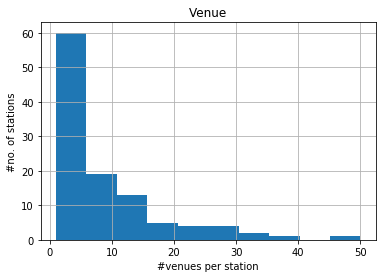

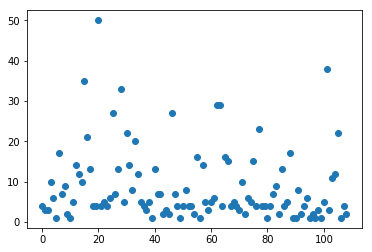

In [14]:
#Check the number of venues around each station
import matplotlib.pyplot as plt
%matplotlib inline
nos_venues = station_venues.groupby('Station')['Venue'].count()
nos_venues = pd.DataFrame(nos_venues)
print(nos_venues.head())


#Histogram of venues
nos_venues.hist( )
plt.xlabel('#venues per station')
plt.ylabel('#no. of stations')
plt.savefig('venues_hist.png')
#Scatterplot no. of venues
plt.figure()
plt.scatter( range(len(nos_venues)),  nos_venues )
plt.savefig('stn_vs_nosvenues.png')
plt.show()

# Cluster based on no. of neighborhood


In [15]:
#Cluster based on neighborhood

#One-hot encoding
station_onehot = pd.get_dummies(station_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
station_onehot['Station'] = station_venues['Station'] 

# move neighborhood column to the first column
fixed_columns = [station_onehot.columns[-1]] + list(station_onehot.columns[:-1])
station_onehot = station_onehot[fixed_columns]

station_onehot.head()
#

,Station,ATM,Accessories Store,Airport,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,...,Tourist Information Center,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Airoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Airoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Airoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Airoli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ambarnath,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [16]:
print(station_onehot.shape)
station_grouped = station_onehot.groupby('Station').mean().reset_index()
station_grouped

(946, 166)


,Station,ATM,Accessories Store,Airport,American Restaurant,Amphitheater,Aquarium,Arcade,Art Gallery,Arts & Crafts Store,...,Tourist Information Center,Trail,Train,Train Station,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Airoli,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,Ambarnath,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0
2,Ambivli,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0
3,Andheri,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,Asangaon,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.166667,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,Vikhroli,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0
105,Vile Parle,0.000000,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
106,Virar,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
107,Vithalwadi,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.250000,0.000000,0.0,0.0,0.0,0.0,0.0


In [17]:
#Generate list of top 10 venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [18]:
num_top_venues = 4

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_venues_sorted = pd.DataFrame(columns=columns)
station_venues_sorted['Station'] = station_grouped['Station']

for ind in np.arange(station_grouped.shape[0]):
    station_venues_sorted.iloc[ind, 1:] = return_most_common_venues(station_grouped.iloc[ind, :], num_top_venues)

station_venues_sorted.head()

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Airoli,Platform,Indian Restaurant,Food Court,Office
1,Ambarnath,ATM,Train Station,Mobile Phone Shop,Donut Shop
2,Ambivli,Indian Restaurant,Train Station,Platform,Donut Shop
3,Andheri,Fast Food Restaurant,Indian Restaurant,Restaurant,Paper / Office Supplies Store
4,Asangaon,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Train,Food Court


## Clustering

In [19]:
from sklearn.cluster import KMeans
kclusters = 7
#print(station_grouped_clustering.head())
station_grouped_clustering = station_grouped.drop('Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(station_grouped_clustering)

station_venues.shape

(946, 12)

In [20]:
# add clustering labels
#print(station_venues_sorted['Cluster Labels'].head())
station_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

stationNames.drop('index', 1, inplace=True)
print(stationNames.columns)
print(stationNames.head())
stationNames.columns=['Station', 'Station Latitude', 'Station Longitude']
station_merged = stationNames

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
station_merged = station_merged.join(station_venues_sorted.set_index('Station'), on='Station', how='inner')
station_merged.head() # check the last columns!

Index(['StationName', 'latitude', 'longitude'], dtype='object')
  StationName   latitude  longitude
0      Airoli  19.159246  72.998512
1   Ambarnath  19.094332  73.300895
2     Ambivli  19.267645  73.171863
3     Andheri  19.119698  72.846420
4    Asangaon  19.440912  73.306518


,Station,Station Latitude,Station Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Airoli,19.159246,72.998512,0,Platform,Indian Restaurant,Food Court,Office
1,Ambarnath,19.094332,73.300895,4,ATM,Train Station,Mobile Phone Shop,Donut Shop
2,Ambivli,19.267645,73.171863,0,Indian Restaurant,Train Station,Platform,Donut Shop
3,Andheri,19.119698,72.846420,0,Fast Food Restaurant,Indian Restaurant,Restaurant,Paper / Office Supplies Store
4,Asangaon,19.440912,73.306518,3,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Train,Food Court


## Map

In [21]:
#Plot on a map
import matplotlib.cm as cm
import matplotlib.colors as colors

lat_centre = 18.975
lon_centre =  72.8258

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

station_clusters = folium.Map(location=[lat_centre, lon_centre], zoom_start=9)

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(station_merged['Station Latitude'], station_merged['Station Longitude'], station_merged['Station'], station_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(station_clusters)
station_clusters.save(outfile='station_clusters.png', close_file=True)
station_clusters

# Analyze the clusters

In [22]:
station_merged.loc[station_merged['Cluster Labels'] == 0, station_merged.columns[[0] + list(range(4, station_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
0,Airoli,Platform,Indian Restaurant,Food Court,Office
2,Ambivli,Indian Restaurant,Train Station,Platform,Donut Shop
3,Andheri,Fast Food Restaurant,Indian Restaurant,Restaurant,Paper / Office Supplies Store
7,Bandra,Indian Restaurant,Café,Paper / Office Supplies Store,Brewery
14,Byculla,Indian Restaurant,Zoo,Park,Bar
15,CBD Belapur,Indian Restaurant,Tea Room,Fast Food Restaurant,Train Station
17,Chembur,Indian Restaurant,Seafood Restaurant,Vegetarian / Vegan Restaurant,Bar
18,Chhatrapati Shivaji Maharaj Terminus,Indian Restaurant,Bar,Train Station,Irani Cafe
23,Currey Road,Maharashtrian Restaurant,Coffee Shop,Mediterranean Restaurant,Plaza
32,Prabhadevi,Indian Restaurant,Bakery,Café,Electronics Store


In [23]:
station_merged.loc[station_merged['Cluster Labels'] == 1, station_merged.columns[[0] + list(range(4, station_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
10,Bhivpuri Road,Train Station,Trail,Zoo,Donut Shop
42,Juinagar,Train Station,Café,Campground,Donut Shop
46,Kaman Road,Train Station,Zoo,Donut Shop,Field
50,Kasara,Restaurant,Train Station,Zoo,Donut Shop
52,Kelve Road,Train Station,Platform,Zoo,Fast Food Restaurant
54,Khandeshwar,Train Station,Zoo,Donut Shop,Field
62,Kopar,Train Station,Light Rail Station,Diner,Dumpling Restaurant
87,Nilaje,Café,Train Station,Donut Shop,Field
92,Ram Mandir,Train Station,Tea Room,Multiplex,Zoo
93,Roha,Train Station,Indian Restaurant,Platform,Donut Shop


In [24]:
station_merged.loc[station_merged['Cluster Labels'] == 2, station_merged.columns[[0] + list(range(4, station_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
6,Badlapur,Grocery Store,Zoo,Donut Shop,Field


In [25]:
station_merged.loc[station_merged['Cluster Labels'] == 3, station_merged.columns[[0] + list(range(4, station_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
4,Asangaon,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Train,Food Court
25,Dahanu Road,Fast Food Restaurant,Train Station,Zoo,Donut Shop
45,Kalyan,Fast Food Restaurant,Playground,Restaurant,Pizza Place
58,Kharghar,Fast Food Restaurant,Café,Train Station,Donut Shop
63,Kopar Khairane,Fast Food Restaurant,Food,Train Station,Zoo
114,Vangaon,Fast Food Restaurant,Zoo,Fish Market,Field


In [26]:
station_merged.loc[station_merged['Cluster Labels'] == 4, station_merged.columns[[0] + list(range(4, station_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
1,Ambarnath,ATM,Train Station,Mobile Phone Shop,Donut Shop
8,Bhandup,Train Station,Indian Restaurant,Women's Store,Falafel Restaurant
9,Bhayandar,Bakery,Bike Rental / Bike Share,Ice Cream Shop,Platform
12,Boisar,Ice Cream Shop,Pizza Place,Train Station,Mobile Phone Shop
13,Borivali,Clothing Store,Chinese Restaurant,Ice Cream Shop,Restaurant
16,Charni Road,Indian Restaurant,Juice Bar,Ice Cream Shop,Restaurant
19,Chinchpokli,Fast Food Restaurant,Coffee Shop,Multiplex,Spa
20,Chunabhatti,Bus Station,Train Station,Metro Station,Event Space
21,Churchgate,Indian Restaurant,Ice Cream Shop,Cricket Ground,Hotel
22,Cotton Green,Department Store,Train Station,Bakery,Plaza


In [27]:
station_merged.loc[station_merged['Cluster Labels'] == 5, station_merged.columns[[0] + list(range(4, station_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
68,Mahim,Beach,Zoo,Electronics Store,Fish & Chips Shop


In [28]:
station_merged.loc[station_merged['Cluster Labels'] == 6, station_merged.columns[[0] + list(range(4, station_merged.shape[1]))]]

,Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue
11,Bhiwandi,Theater,Donut Shop,Field,Fast Food Restaurant


In [29]:
station_merged.groupby('Cluster Labels').size()
#Cluster based on location?
#Cluster based on neighborhood
#Map clusters
#Analyse

Cluster Labels
0    33
1    13
2     1
3     6
4    54
5     1
6     1
dtype: int64

In [30]:
station_venues_sorted.shape

(109, 6)